<a href="https://colab.research.google.com/github/khushu-cs/ml-projects/blob/main/INSURANCE_PREMIUM_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSURANCE PREMIUM PREDICTION USING RANDOM FOREST REGRESSION

## GET UNDERSTANDING ABOUT DATA SET


*   ID

*   AGE

*   GENDER
*   BMI


*   CHILDREN


*   SMOKER

*   REGION

*   PREMIUM






In [1]:
import pandas as pd

In [2]:
import numpy as np

## IMPORT CSV AS DATAFRAME.

In [3]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Insurance%20Premium.csv')

## GET THE FIRST FIVE ROWS OF DATAFRAME

In [4]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


GET INFORMATION OF DATAFRAME

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Children  1338 non-null   int64  
 5   Smoker    1338 non-null   object 
 6   Region    1338 non-null   object 
 7   Premium   1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


## GET THE SUMMARY STATISTICS

In [6]:
df.describe()

,ID,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.414798
std,386.391641,14.049960,6.098187,1.205493,12110.012882
min,1.000000,18.000000,15.960000,0.000000,1122.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.000000
75%,1003.750000,51.000000,34.693750,2.000000,16640.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.000000


## GET THE CATEGORIES AND COUNTS OF CATEGORICAL VARIABLES

In [7]:
df[['Gender']].value_counts()

Gender
male      676
female    662
dtype: int64

In [8]:
df[['Smoker']].value_counts()

Smoker
no        1064
yes        274
dtype: int64

In [9]:
df[['Region']].value_counts()

Region
east      364
south     325
west      325
north     324
dtype: int64

## GET COLUMNS NAME

In [10]:
df.columns

Index(['ID', 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region',
       'Premium'],
      dtype='object')

## GET SHAPE OF DATAFRAME

In [12]:
df.shape

(1338, 8)

In [13]:
df.replace({'Gender':{'male':0 , 'female':1}}, inplace=True)

In [14]:
df.replace({'Smoker':{'no':0 , 'yes':1}}, inplace=True)

In [16]:
df.replace({'Region':{'north':0 , 'east':1 , 'south':2 , 'west':3}}, inplace=True)

## DEFINE Y (DEPENDENT OR LABEL OR TARGET VARIABLE) AND X(INDEPENDENT OR FEATURES OR ATTRIBUTE VARIABLE)

In [17]:
y = df['Premium']

In [18]:
y.shape

(1338,)

In [19]:
y

0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1333    10601
1334     2206
1335     1630
1336     2008
1337    29141
Name: Premium, Length: 1338, dtype: int64

In [20]:
X = df[['Age','Gender','BMI','Children','Smoker','Region']]

or  use .drop function to define X

In [21]:
X = df.drop(['ID','Premium'],axis=1)

In [22]:
X.shape

(1338, 6)

In [23]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,2


## GET X VARIABLES STANDARDISED

STANDARDISED OF DATASETS IS A COOMON REQUIREMENT FOR MANY MACHINE LEARNING ESTIMATIONS IMPLEMENTED IN SCIKIT-LEARN;
THEY MIGHT BEHAVE BADLY IF THE INDIVIDUAL FEATURES DO NOT MORE OR LESS LOOK LIKE STANDARD NORMALLY DISTRIBUTED DATA:GAUSSIAN WITH ZERO MEAN AND UNIT VARIANCE.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
X_std = df[['Age','BMI']]

In [27]:
X_std = sc.fit_transform(X_std)

In [28]:
X_std

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [29]:
X[['Age','BMI']] = pd.DataFrame(X_std,columns = ['Age','BMI'])

In [30]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,-1.438764,1,-0.453320,0,1,2
1,-1.509965,0,0.509621,1,0,1
2,-0.797954,0,0.383307,3,0,1
3,-0.441948,0,-1.305531,0,0,3
4,-0.513149,0,-0.292556,0,0,3
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,3
1334,-1.509965,1,0.206139,0,0,0
1335,-1.509965,1,1.014878,0,0,1
1336,-1.296362,1,-0.797813,0,0,2


## GET TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2529)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

## GET MODEL TRAIN

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(random_state=2529)

In [37]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

## GET MODEL PREDICTION

In [38]:
y_pred = rfr.predict(X_test)

In [39]:
y_pred.shape

(268,)

In [40]:
y_pred

array([13371.68      ,  4288.26      ,  9032.84      ,  4040.25      ,
        5309.57      , 13991.25      , 14199.77      ,  3515.28      ,
       10323.48      ,  3450.04      , 33355.04      ,  1973.4       ,
       14429.98      ,  8165.4       , 25308.29      , 28548.37      ,
        8118.45      , 22036.37      , 13110.53      , 10997.54      ,
        7780.21      ,  7280.67      ,  4082.55533333,  6727.39      ,
        5870.86      , 19385.02      , 17158.38      , 31625.93      ,
       14601.78      , 39947.41      , 47052.06      ,  7406.08      ,
        5416.43      ,  4667.76      , 40909.74      , 10357.81      ,
       11359.43      , 35129.46      , 16852.98      ,  5414.25      ,
        5295.59      , 11274.92      , 45896.91      , 11521.96      ,
       15874.27      , 10828.95      , 16575.95      ,  9388.2       ,
        2149.41      , 48153.35      ,  1162.33      , 45791.92      ,
        3617.13      ,  4424.78      ,  5044.08      ,  9605.9       ,
      

## GET MODEL EVALUATION

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mean_squared_error(y_test,y_pred)

26155432.23178127

In [43]:
mean_absolute_error(y_test,y_pred)

2920.52977238806

In [44]:
r2_score(y_test,y_pred)

0.829765888008799

## GET VISUALIZATION OF ACTUAL VERSUS PREDICTED RESULTS

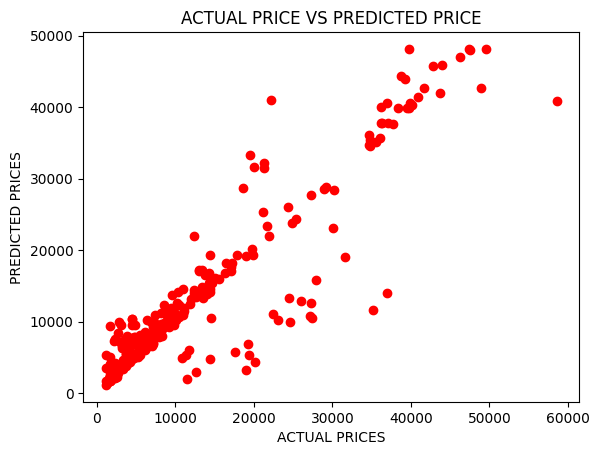

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('ACTUAL PRICES')
plt.ylabel('PREDICTED PRICES')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.show()

# GET FUTURE PREDICTIONS
  STEPS TO FOLLOW

  1.DEFINE X AS NUMPY ARRAY[22,0,39,5,0,0,2]

  2.AGE 22 AFTER STANDARDIZATION IS -1.22516069

  3.BMI AFTER STANDARDIZATION IS 1.44959597

  4.Y ACTUAL IS 1683

  5.PREDICT



In [53]:
X_new = np.array([-1.22516069,0,1.44959597,0,0,2])

In [55]:
X_new = X_new.reshape(-1,6)

In [56]:
X_new.shape

(1, 6)

In [57]:
y_pred_new = rfr.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
y_pred_new

array([1864.94])